In [28]:
import os
os.chdir("E:\PM\Kriging")
#!pip install pykrige This is for installing the pykrige package

In [2]:
import pandas as pd
df=pd.read_csv("python-split.csv")
from datetime import datetime
def date_to_delta(x):#transform numerate date to datetime
    x=str(x)
    time=datetime.strptime(x,"%Y%m%d")
    return time

In [3]:
#split by pollution
pollution_set=set(df["pol"])
for p in pollution_set:
    sub_df=df[df["pol"]==p]
    sub_df["date"]=sub_df["date"].apply(date_to_delta)
    sub_df=sub_df.sort_values("date",ascending=False)
    sub_df.to_csv(p+".csv")

<ipython-input-3-e03ffbf299a5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["date"]=sub_df["date"].apply(date_to_delta)


In [36]:
import numpy as np
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
#from pykrige.uk import UniversalKriging
import matplotlib.pyplot as plt

In [158]:
#Data prepration step
'''data = np.array(
    [
        [0.3, 1.2, 0.47],
        [1.9, 0.6, 0.56],
        [1.1, 3.2, 0.74],
        [3.3, 4.4, 1.47],
        [4.7, 3.8, 1.74],
    ]
)'''
data=np.array(example_df)
gridx = np.arange(x_min, x_max,(3/101))
gridy = np.arange(y_min,y_max,(3/111))

In [159]:
OK = OrdinaryKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model="linear",
    verbose=False,
    enable_plotting=False,
)

In [160]:
z, ss = OK.execute("grid", gridx, gridy)

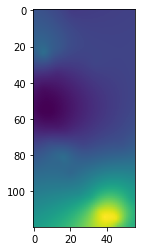

In [161]:
kt.write_asc_grid(gridx, gridy, z, filename="output.asc")
plt.imshow(z)
plt.show()

In [114]:
no_df=pd.read_csv("NO.csv",index_col=0)
example_df=no_df[no_df["date"]=='2016-09-30']

In [123]:
example_df=example_df[["x","y","log_avg"]]
x_min=example_df["x"].min()
x_max=example_df["x"].max()
y_min=example_df["y"].min()
y_max=example_df["y"].max()

In [1]:
import numpy as np
ascii_grid = np.loadtxt("output.asc",skiprows=7)

OSError: output.asc not found.

In [163]:
ascii_grid.shape

(120, 56)

In [134]:
r_df=pd.read_csv("20160930_R_out.csv")

In [137]:
r_df.describe()

,x,y,var1.pred,var1.var,var1.stdev
count,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,120.972098,23.757230,1.200611,0.799810,0.892732
std,0.428557,0.766046,0.300228,0.092504,0.053296
min,120.039230,21.934511,0.625092,0.470116,0.685650
25%,120.639230,23.164511,1.056142,0.734763,0.857183
50%,120.969230,23.764511,1.158006,0.827047,0.909421
75%,121.299220,24.364511,1.253077,0.880114,0.938144
max,121.989230,25.294510,2.908272,0.911487,0.954719
